# Séries Temporais I

A base `trabalhadores.xlsx` mostra a quantidade de trabalhadores (em mil) de uma
certa indústria, ao longo de 5 anos com variações mensais. Efetue a decomposição e
analise os resultados. Teste o modelo aditivo e o multiplicativo e compare os
resultados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o conjunto de dados
data = pd.read_excel("trabalhadores.xlsx")

# Visualizando as primeiras linhas do dataframe
data.head()

,Data,trabalhadores
0,2017-01-01,241.9
1,2017-02-01,239.3
2,2017-03-01,245.5
3,2017-04-01,249.6
4,2017-05-01,255.7


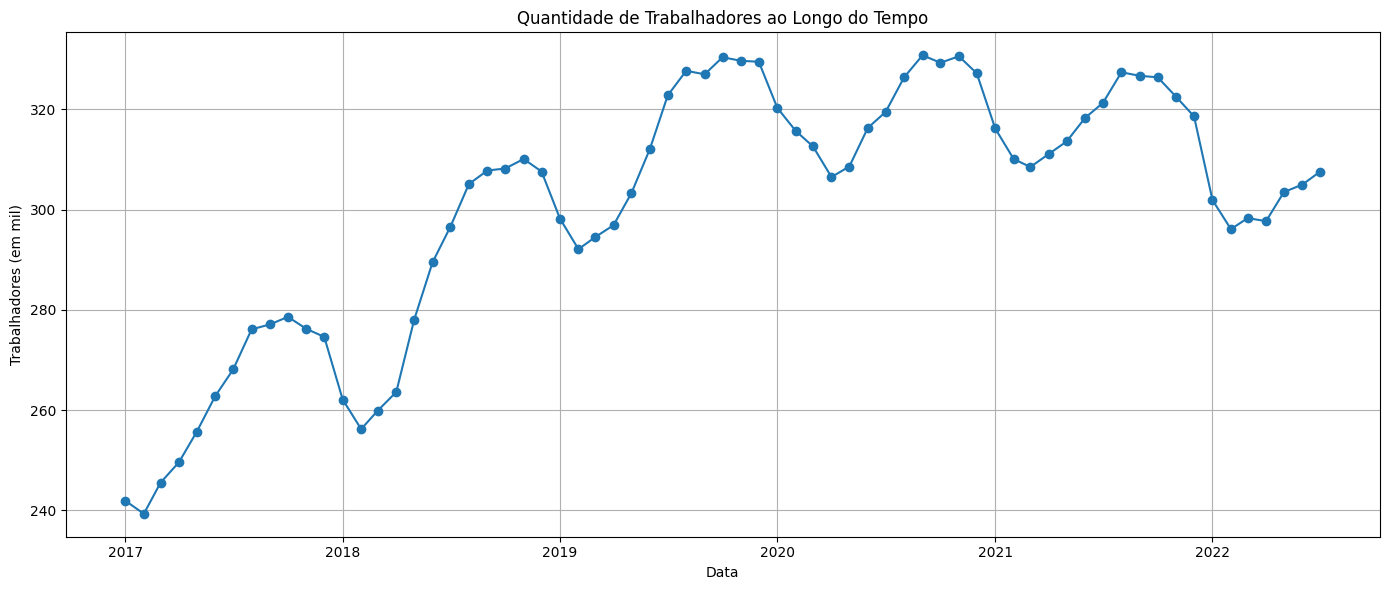

In [2]:
# Plotando a série temporal
plt.figure(figsize=(14, 6))
plt.plot(data["Data"], data["trabalhadores"], marker='o', linestyle='-')
plt.title("Quantidade de Trabalhadores ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Trabalhadores (em mil)")
plt.grid(True)
plt.tight_layout()
plt.show()

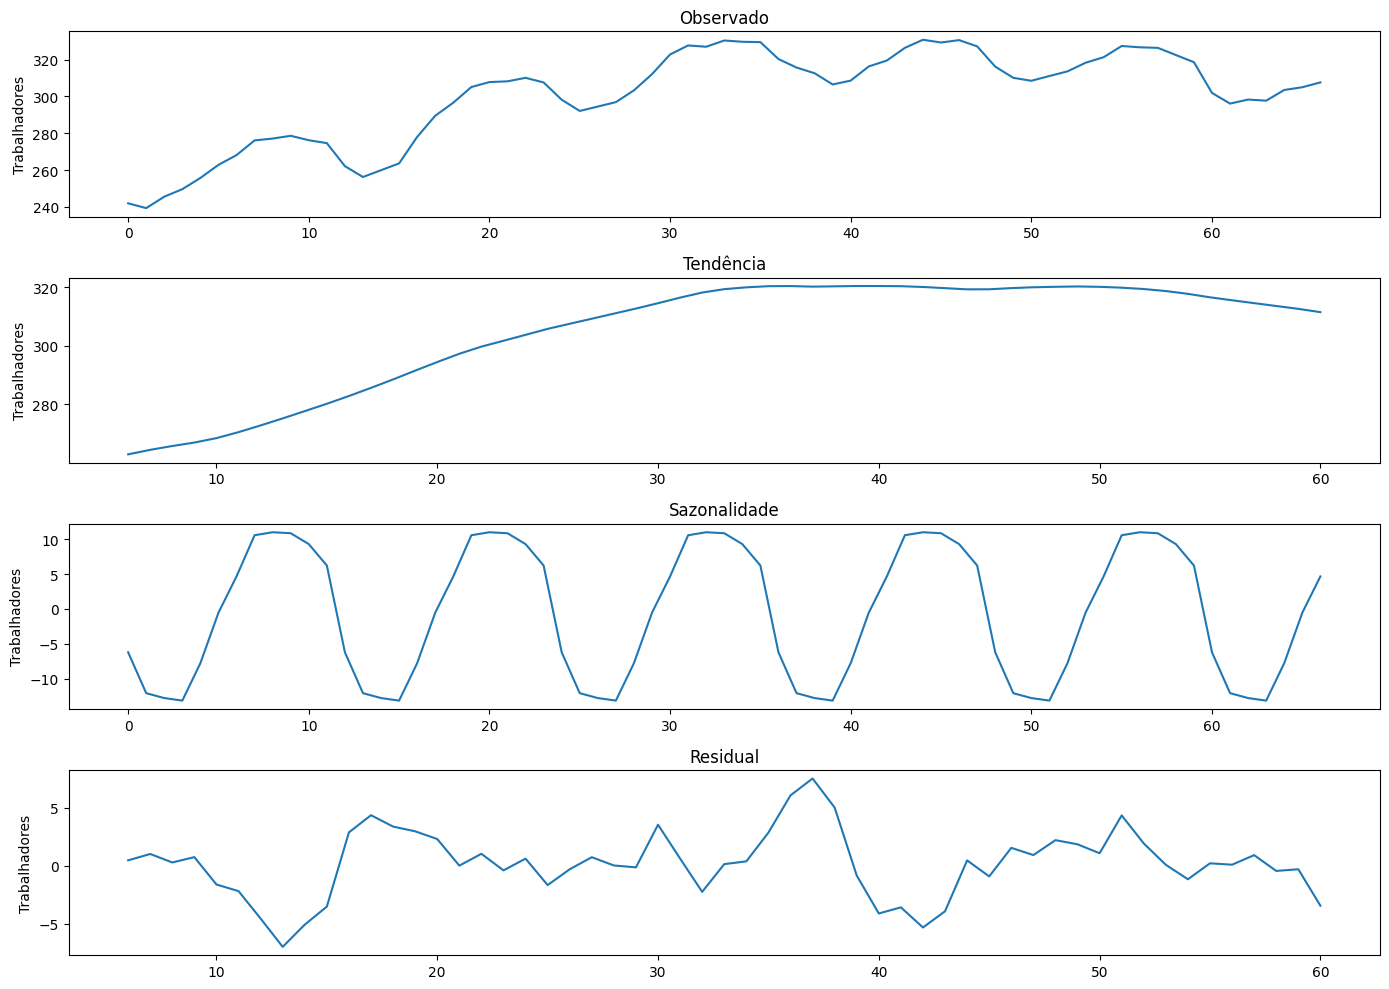

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição usando o modelo aditivo sem o parâmetro freq
decomposition_additive = seasonal_decompose(data["trabalhadores"], model='additive', period=12)

# Plotando os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
decomposition_additive.observed.plot(ax=ax1)
ax1.set(title='Observado', ylabel='Trabalhadores')
decomposition_additive.trend.plot(ax=ax2)
ax2.set(title='Tendência', ylabel='Trabalhadores')
decomposition_additive.seasonal.plot(ax=ax3)
ax3.set(title='Sazonalidade', ylabel='Trabalhadores')
decomposition_additive.resid.plot(ax=ax4)
ax4.set(title='Residual', ylabel='Trabalhadores')

plt.tight_layout()
plt.show()

Observado: É a série temporal original.
Tendência: Mostra uma tendência ascendente ao longo do tempo.
Sazonalidade: Exibe o padrão sazonal que se repete a cada ano.
Residual: Representa o ruído ou o que não foi explicado pela tendência e sazonalidade.

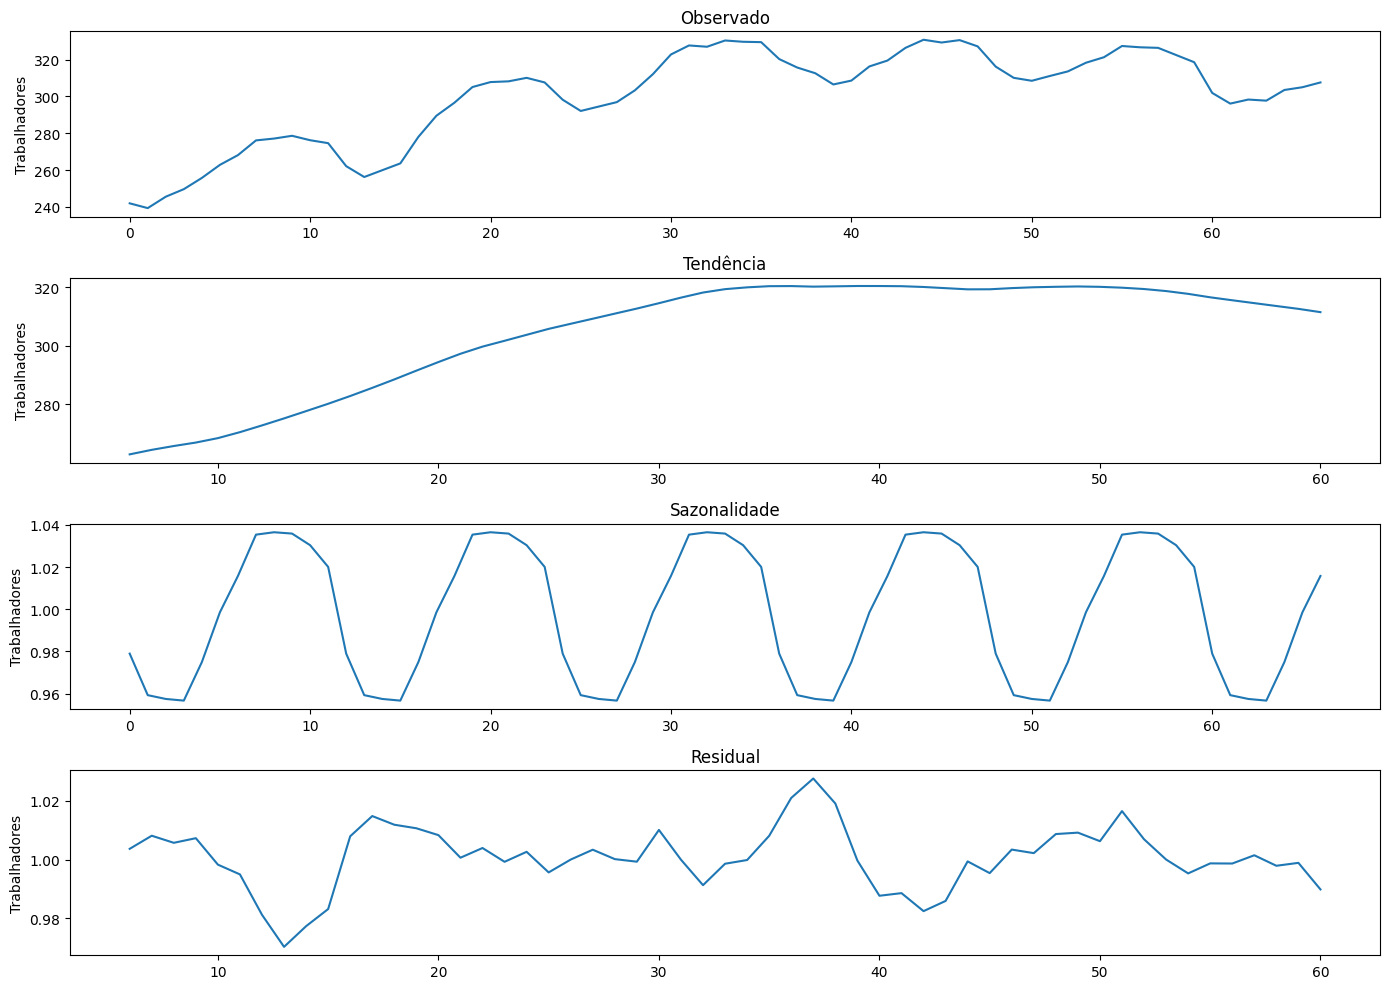

In [4]:
# Decomposição usando o modelo multiplicativo
decomposition_multiplicative = seasonal_decompose(data["trabalhadores"], model='multiplicative', period=12)

# Plotando os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
decomposition_multiplicative.observed.plot(ax=ax1)
ax1.set(title='Observado', ylabel='Trabalhadores')
decomposition_multiplicative.trend.plot(ax=ax2)
ax2.set(title='Tendência', ylabel='Trabalhadores')
decomposition_multiplicative.seasonal.plot(ax=ax3)
ax3.set(title='Sazonalidade', ylabel='Trabalhadores')
decomposition_multiplicative.resid.plot(ax=ax4)
ax4.set(title='Residual', ylabel='Trabalhadores')

plt.tight_layout()
plt.show()

#### Análise:
Ambas as decomposições, aditiva e multiplicativa, mostram uma tendência ascendente temporal.
O padrão sazonal é visível em ambas as decomposições, embora seja representado de maneira um pouco diferente.
Os resíduos para ambas as decomposições são diferentes. Na decomposição multiplicativa, os resíduos tendem a estar mais próximos de 1, enquanto na decomposição aditiva, eles tendem a estar mais próximos de 0.
A escolha entre os modelos aditivo e multiplicativo depende da natureza da série temporal e do domínio de aplicação. Geralmente, se a amplitude da sazonalidade não aumentar com o tempo, o modelo aditivo pode ser mais apropriado. Se a amplitude da sazonalidade aumentar proporcionalmente ao nível da série, o modelo multiplicativo pode ser mais adequado.

A base `clientes.xlsx` é uma base que mostra a evolução no número de clientes de uma
certa indústria ao longo de um período de 144 meses (12 anos). Decomponha a série
temporal identificando a tendência a sazonalidade e o resíduo desta série.
 Após isso utilizando construa um modelo ARIMA (ou SARIMA) considerando os
120 primeiros meses e projetando os outros 24 meses. Avalie os resultados

In [5]:
# Carregando o conjunto de dados de clientes
clientes_data = pd.read_excel("Clientes.xlsx")

# Visualizando as primeiras linhas do dataframe
clientes_data.head()

,Data,Clientes
0,2010-01-01,112
1,2010-02-01,118
2,2010-03-01,132
3,2010-04-01,129
4,2010-05-01,121


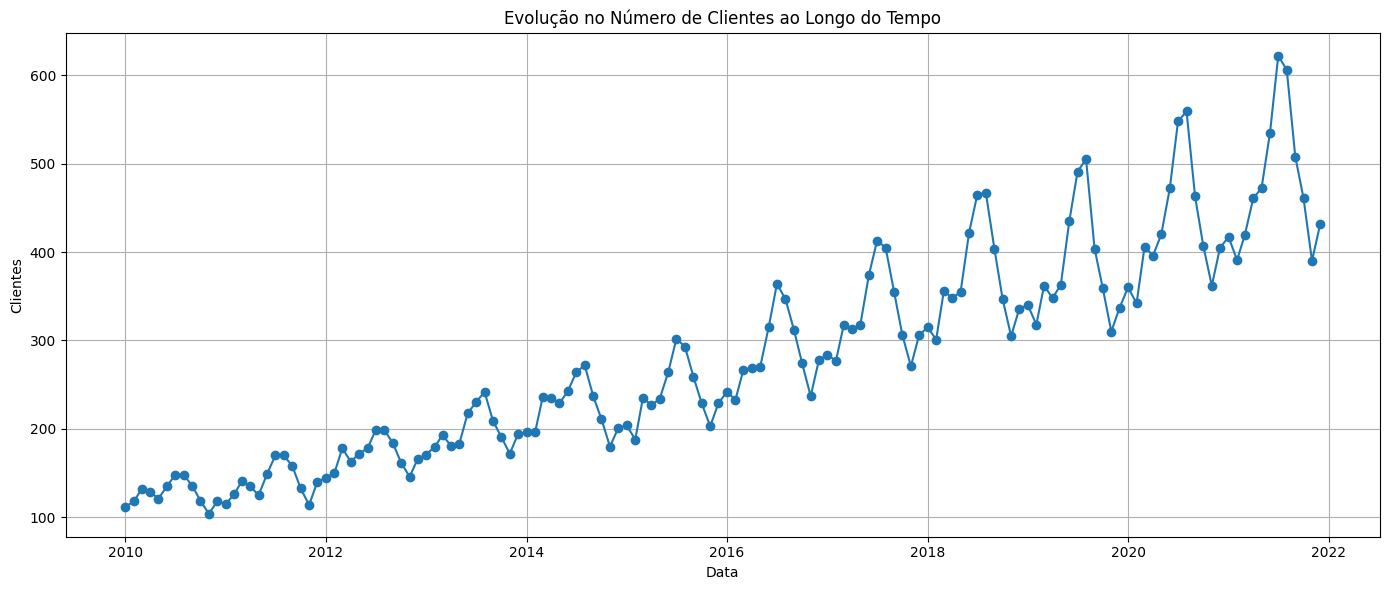

In [6]:
# Plotando a série temporal de clientes
plt.figure(figsize=(14, 6))
plt.plot(clientes_data["Data"], clientes_data["Clientes"], marker='o', linestyle='-')
plt.title("Evolução no Número de Clientes ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Clientes")
plt.grid(True)
plt.tight_layout()
plt.show()

A série temporal mostra a evolução do número de clientes ao longo de 12 anos. Parece haver uma tendência ascendente e um padrão sazonal.

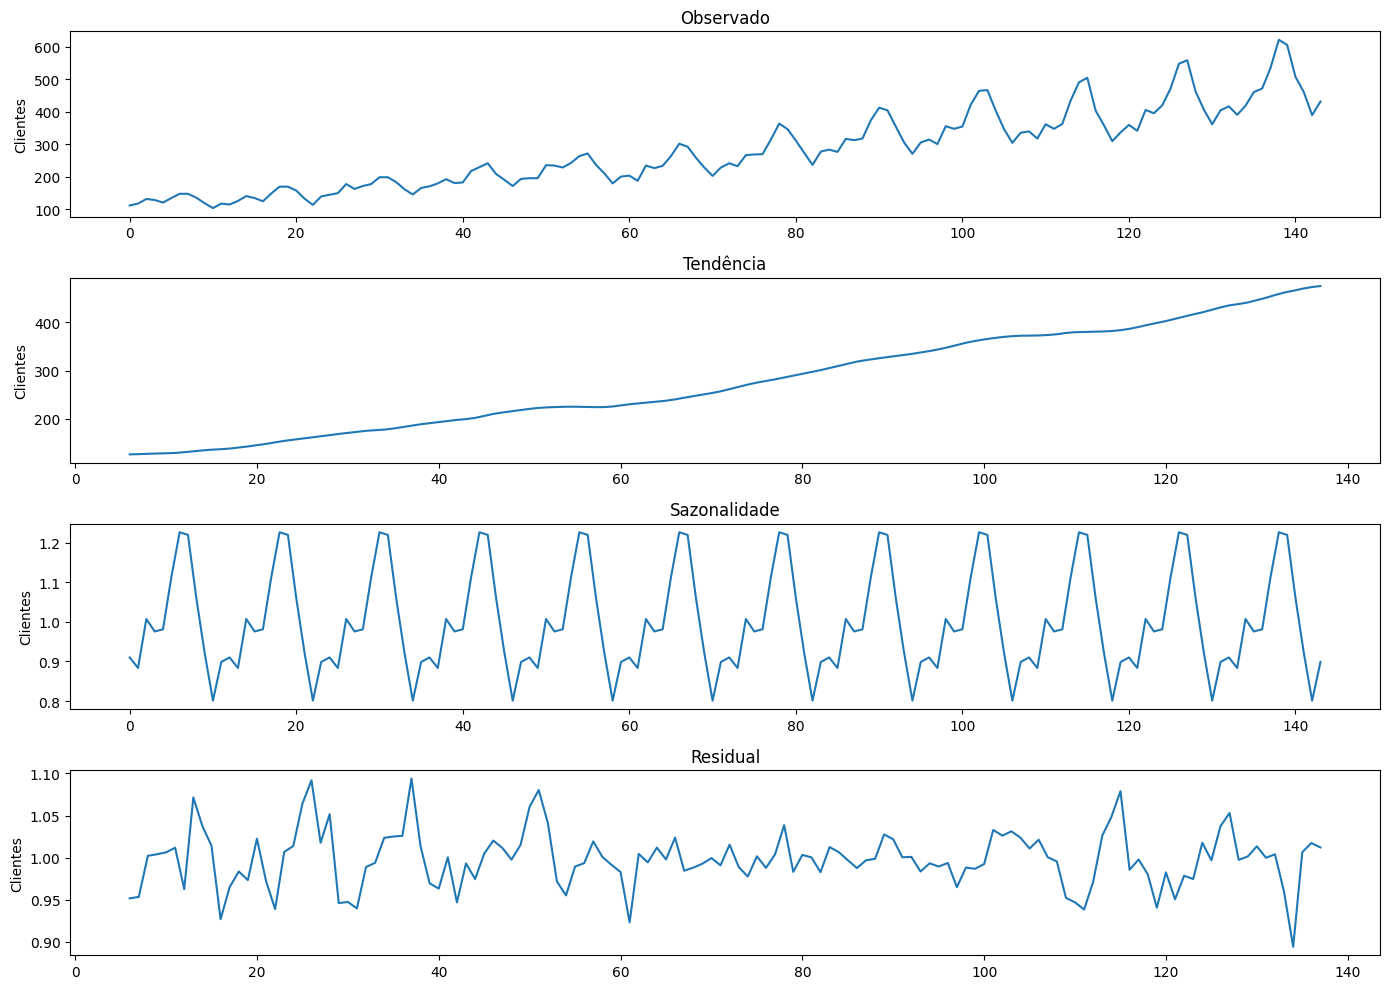

In [7]:
# Decomposição da série temporal de clientes
decomposition_clientes = seasonal_decompose(clientes_data["Clientes"], model='multiplicative', period=12)

# Plotando os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
decomposition_clientes.observed.plot(ax=ax1)
ax1.set(title='Observado', ylabel='Clientes')
decomposition_clientes.trend.plot(ax=ax2)
ax2.set(title='Tendência', ylabel='Clientes')
decomposition_clientes.seasonal.plot(ax=ax3)
ax3.set(title='Sazonalidade', ylabel='Clientes')
decomposition_clientes.resid.plot(ax=ax4)
ax4.set(title='Residual', ylabel='Clientes')

plt.tight_layout()
plt.show()

Observado: Este é o gráfico da série temporal original.
Tendência: Mostra uma tendência ascendente ao longo do tempo.
Sazonalidade: Podemos ver claramente um padrão sazonal que se repete a cada ano.
Residual: Os resíduos representam as variações que não são explicadas pela tendência e sazonalidade.

In [8]:
train_data = clientes_data["Clientes"].iloc[:120]
test_data = clientes_data["Clientes"].iloc[120:]

train_data.tail(), test_data.head()

(115    505
 116    404
 117    359
 118    310
 119    337
 Name: Clientes, dtype: int64,
 120    360
 121    342
 122    406
 123    396
 124    420
 Name: Clientes, dtype: int64)

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from itertools import product

# Definindo os possíveis parâmetros para o modelo SARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Buscando pelo melhor conjunto de parâmetros com base no AIC
best_aic = float("inf")
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

best_params, best_seasonal_params, best_aic

((0, 1, 1), (0, 1, 1, 12), 707.5086518255489)

O melhor conjunto de parâmetros para o modelo SARIMA, com base no critério de informação de Akaike (AIC), é:

Ordem (p, d, q): (0, 1, 1)
Ordem Sazonal (P, D, Q, S): (0, 1, 1, 12)
AIC: 707.51

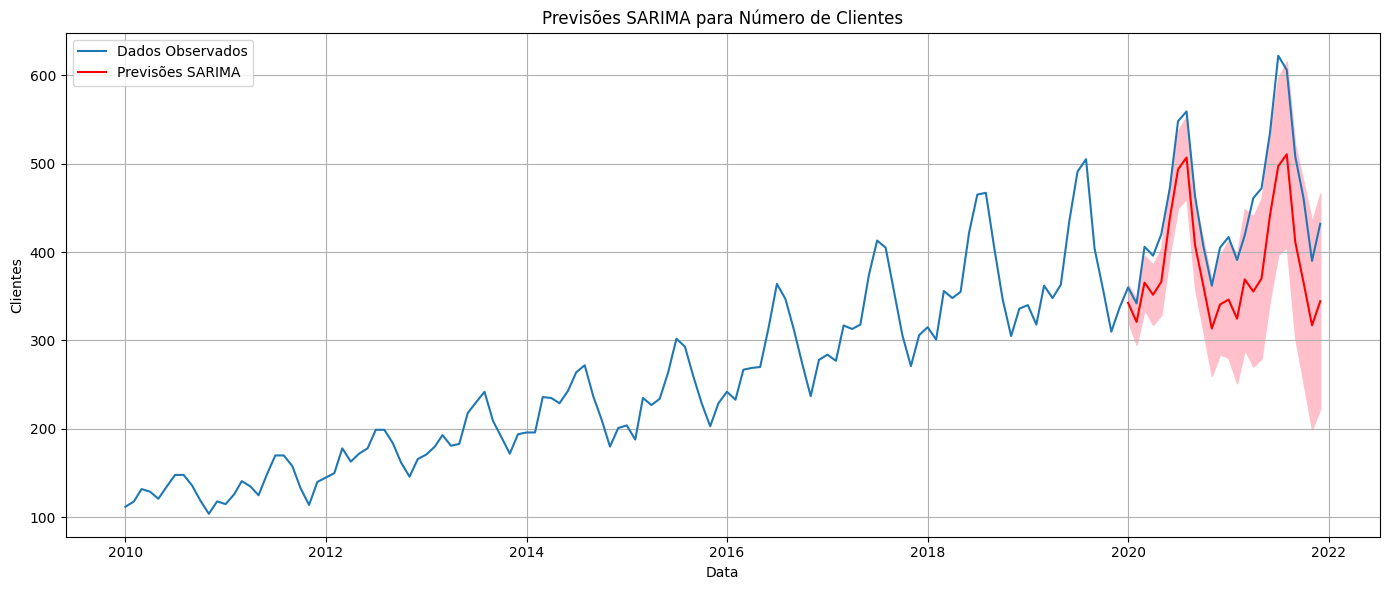

In [10]:
# Ajustando o modelo SARIMA com os melhores parâmetros
sarima_model = SARIMAX(train_data, order=best_params, seasonal_order=best_seasonal_params, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Projetando a série temporal para os próximos 24 meses
forecast = sarima_results.get_forecast(steps=24)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotando as previsões
plt.figure(figsize=(14, 6))
plt.plot(clientes_data["Data"], clientes_data["Clientes"], label='Dados Observados')
plt.plot(clientes_data["Data"].iloc[120:], mean_forecast.values, color='red', label='Previsões SARIMA')
plt.fill_between(clientes_data["Data"].iloc[120:], confidence_intervals["lower Clientes"], confidence_intervals["upper Clientes"], color='pink')
plt.title("Previsões SARIMA para Número de Clientes")
plt.xlabel("Data")
plt.ylabel("Clientes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico mostra as previsões do modelo SARIMA para o número de clientes nos próximos 24 meses (em vermelho), com os intervalos de confiança em rosa. As observações reais estão em azul.

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculando métricas de erro
mape = np.mean(np.abs((test_data - mean_forecast.values) / test_data)) * 100
mse = mean_squared_error(test_data, mean_forecast.values)
rmse = np.sqrt(mse)

mape, mse, rmse

(14.408991639428887, 5159.4688730961725, 71.8294429401772)

Erro Percentual Absoluto Médio (MAPE): 14.41%
Erro Quadrático Médio (MSE): 5159.47
Raiz do Erro Quadrático Médio (RMSE): 71.83


O MAPE de 14.41% indica que as previsões do modelo estão, em média, 14.41% distantes dos valores observados. O RMSE indica que as previsões têm um erro médio de aproximadamente 71.83 unidades em relação aos valores observados.

A base `Duráveis.xlsx` mostra as vendas de bens duráveis no mercado americano num
período de 21 anos. Com base nesses dados construa dois modelos ARIMA(ou
SARIMA) utilizando a função auto_arima. No primeiro modelo considere a opção
“stepwise=True” e na segunda execução “stepwise=False”. Aponte as diferenças no
modelo final e no tempo de processamento.

In [20]:
# Carregando o conjunto de dados de bens duráveis
duraveis_data = pd.read_excel("Duraveis.xlsx")

# Visualizando as primeiras linhas do dataframe
duraveis_data.head()

,Data,bens_duraveis
0,2001-01-01,26617
1,2001-02-01,29829
2,2001-03-01,31336
3,2001-04-01,30484
4,2001-05-01,31008


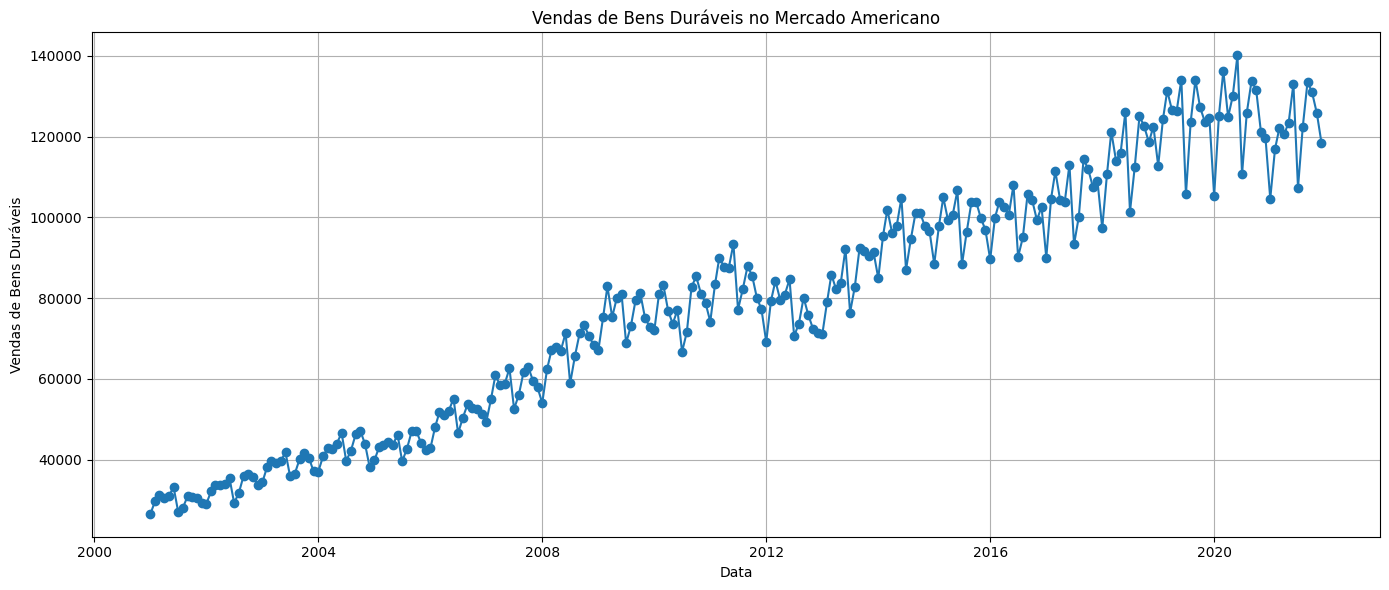

In [21]:
# Plotando a série temporal de bens duráveis
plt.figure(figsize=(14, 6))
plt.plot(duraveis_data["Data"], duraveis_data["bens_duraveis"], marker='o', linestyle='-')
plt.title("Vendas de Bens Duráveis no Mercado Americano")
plt.xlabel("Data")
plt.ylabel("Vendas de Bens Duráveis")
plt.grid(True)
plt.tight_layout()
plt.show()

A série temporal mostra a evolução das vendas de bens duráveis no mercado americano ao longo de 21 anos. Parece haver uma tendência ascendente com algumas variações sazonais.

In [24]:
from pmdarima import auto_arima
import time

ts = duraveis_data["bens_duraveis"]

# Modelo com stepwise=True
start_time_stepwise = time.time()
model_stepwise = auto_arima(ts, seasonal=True, trace=True, stepwise=True, suppress_warnings=True)
end_time_stepwise = time.time()
time_taken_stepwise = end_time_stepwise - start_time_stepwise
print(f"Time taken with stepwise=True: {time_taken_stepwise} seconds")
print(model_stepwise.summary())

# Modelo com stepwise=False
start_time_no_stepwise = time.time()
model_no_stepwise = auto_arima(ts, seasonal=True, trace=True, stepwise=False, suppress_warnings=True)
end_time_no_stepwise = time.time()
time_taken_no_stepwise = end_time_no_stepwise - start_time_no_stepwise
print(f"\nTime taken with stepwise=False: {time_taken_no_stepwise} seconds")
print(model_no_stepwise.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5117.015, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5200.873, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5179.481, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5117.461, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5199.459, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5113.758, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5106.498, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5136.702, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5131.476, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5064.457, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5047.095, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5044.649, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5087.158, Time=0.31 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : 

Modelo ARIMA: O modelo com stepwise=True escolheu uma combinação ARIMA(5,1,1), enquanto o modelo com stepwise=False escolheu ARIMA(5,1,0). Isso indica que o primeiro modelo incluiu um termo MA adicional em comparação com o segundo.
Tempo de Processamento: O modelo com stepwise=True levou mais tempo para ser ajustado em comparação com o modelo com stepwise=False. Isso é uma característica típica da opção stepwise, que, embora seja mais demorada, tenta ser mais minuciosa na busca pelo melhor modelo.
Critérios de Informação: O AIC e o BIC são menores para o modelo com stepwise=True, o que sugere que ele pode ter um melhor ajuste aos dados em comparação com o modelo stepwise=False. Em geral, modelos com AIC e BIC mais baixos são preferíveis, pois equilibram a qualidade do ajuste com a complexidade do modelo.
Componentes do Modelo: O modelo stepwise=True incluiu um termo MA, o que pode ter ajudado a capturar alguma autocorrelação residual nos dados.

A base `Veiculos.xlsx` mostra as vendas de bens duráveis no mercado americano num
período de 21 anos. Com base nesses dados ajuste um modelo ARIMA(ou SARIMA)
utilizando a função auto_arima.
Utilize os 16 primeiros anos como base de desenvolvimento e os últimos 5 como base de
teste. Avalie os resultados.

In [29]:
# Carregando o conjunto de dados de veículos
data_veiculos = pd.read_excel("Veiculos.xlsx")
data_veiculos.head(), data_veiculos.tail()

(        Data  bens_duraveis
 0 2001-01-01           4367
 1 2001-02-01           5147
 2 2001-03-01           5418
 3 2001-04-01           4897
 4 2001-05-01           5002,
           Data  bens_duraveis
 247 2021-08-01          19311
 248 2021-09-01          20827
 249 2021-10-01          23388
 250 2021-11-01          20181
 251 2021-12-01          14344)

In [27]:
train = data_veiculos['bens_duraveis'][:192]  # First 16 years
test = data_veiculos['bens_duraveis'][192:]  # Last 5 years

model_veiculos = auto_arima(train, seasonal=True, trace=True, suppress_warnings=True, stepwise=True)
print(model_veiculos.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3266.984, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3319.944, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3321.917, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3319.959, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3318.262, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3269.977, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3265.009, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3292.431, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3282.991, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3266.914, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3271.113, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3264.233, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3265.856, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3266.490, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept

In [28]:
# Forecasting
forecast = model_veiculos.predict(n_periods=len(test))

# Evaluate the performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8908374.584294595


#### Modelo ARIMA:
Modelo escolhido: ARIMA(5,1,4) (sem componente sazonal)
Tempo total de ajuste: 5.108 segundos
AIC: 3228.436
BIC: 3264.211
Parâmetros do modelo e seus respectivos coeficientes estão listados na tabela.
#### Avaliação do Desempenho:
Mean Squared Error (MSE): 8,908,374.58
#### Observações:
Modelo ARIMA: O modelo ARIMA(5,1,4) foi escolhido pelo auto_arima. Este modelo tem 5 termos autoregressivos (AR), 1 termo de diferenciação e 4 termos de média móvel (MA).
Parâmetros do Modelo: Os coeficientes dos termos AR e MA, juntamente com seus erros padrão e valores p, são fornecidos na tabela. Os valores p ajudam a determinar a significância dos coeficientes. Coeficientes com valores p abaixo de 0,05 são geralmente considerados estatisticamente significativos.
Desempenho: O MSE é uma métrica que avalia a diferença entre os valores previstos e os reais. Um MSE menor indica um melhor desempenho do modelo. No seu caso, o MSE é 8,908,374.58, o que fornece uma indicação quantitativa do desempenho do modelo em relação à base de teste.
#### Conclusão:
O modelo ARIMA(5,1,4) foi ajustado aos primeiros 16 anos de dados e usou esses dados para prever os próximos 5 anos. O desempenho do modelo foi avaliado usando o MSE, que quantifica o erro médio quadrático entre as previsões e os valores reais.

Ao avaliar um modelo ARIMA, é importante não apenas considerar métricas como o MSE, mas também visualizar as previsões em relação aos valores reais e considerar outros critérios, como o AIC e BIC, para escolher o melhor modelo. No geral, você pode considerar este modelo para previsões, mas também pode explorar outros modelos ou técnicas de previsão para comparar o desempenho e escolher o melhor modelo para suas necessidades.